#PROJECT 1 (STATS-EDA)

In [102]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels


In [103]:
orders=pd.read_csv("olist_orders_cleaned.csv")
orders_items=pd.read_csv("olist_order_items_cleaned.csv")
reviews=pd.read_csv("olist_reviews_cleaned.csv")

#fix datatype:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
                                                         
#Merge to filter only variable for stats analysys:
df_merged_orders_items = pd.merge(orders, orders_items, on='order_id', how='inner')
df_merge_analsys=pd.merge(df_merged_orders_items,reviews, on='order_id', how='inner')

mask=["order_id",'order_status',"order_approved_at","order_delivered_customer_date","price","freight_value",'review_score']

#DB filtered:      
analysys=df_merge_analsys[mask].copy()
analysys["delivery_time_days"]=(analysys['order_delivered_customer_date']-analysys["order_approved_at"]).dt.days


#Check stats-index , outlier and distribution :
Function to do it :


In [104]:


def variable_EDA (df,variable): 
    variabile_plot=df[variable].dropna().copy()
    variabile_plot = variabile_plot[variabile_plot > 0]
    print(f"""**** STATISTIC IDEX ****
          
          {variabile_plot.describe()}
        """)
    plt.figure(figsize=(13,7))
    sns.boxplot(x=variabile_plot,color='lightblue')
    # sns.swarmplot(x=variabile_plot, color='darkred', size=3, alpha=0.7)
    plt.title(f'Box Plot / Swarmplot of {variable}')
    plt.xlabel(variable)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(13,7))
    sns.histplot(variabile_plot, bins='auto', kde=True) 
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Analysis for 'Price' Variable

This section performs an Exploratory Data Analysis (EDA) on the 'price' variable, examining its descriptive statistics, distribution, and identifying any potential outliers.

**** STATISTIC IDEX ****

          count    112372.000000
mean        120.378962
std         182.152386
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64
        


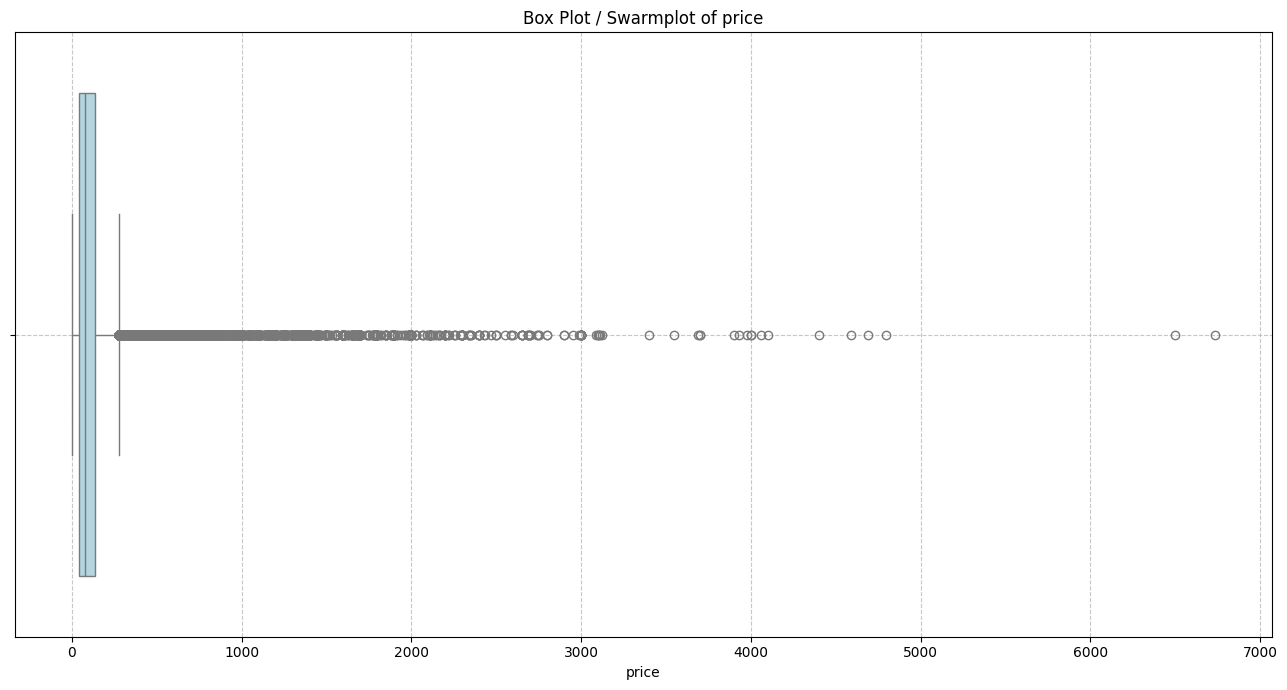

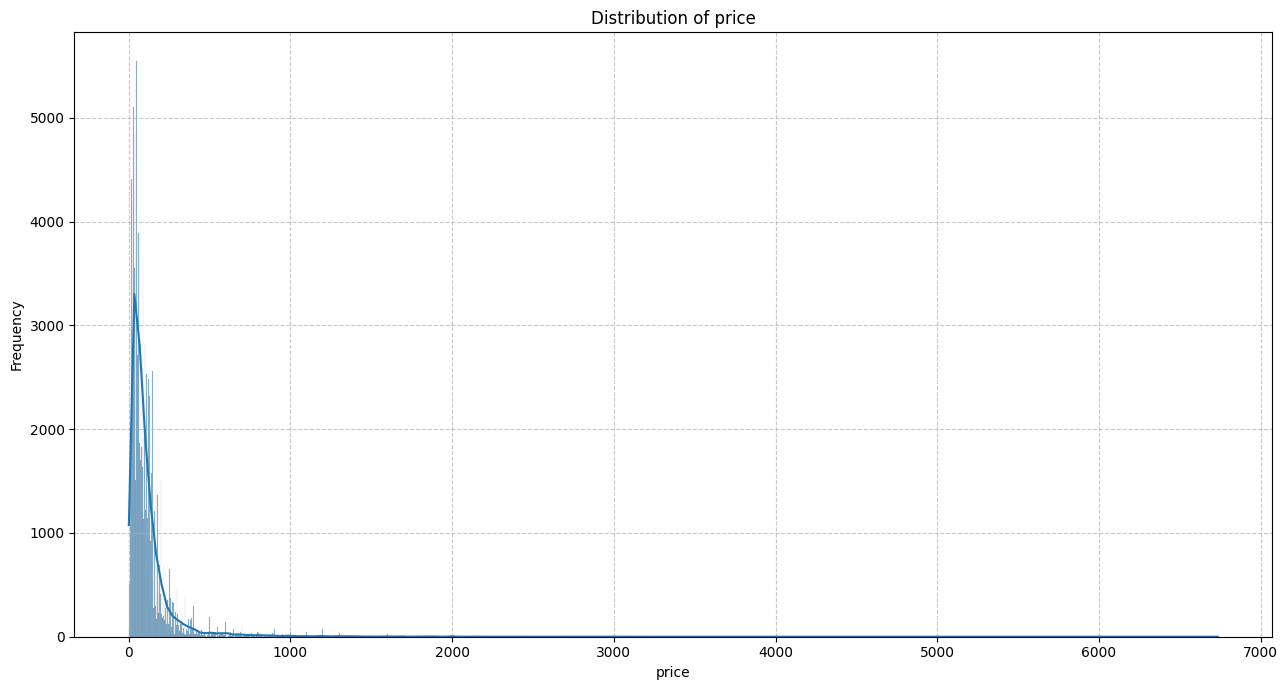

In [105]:
variable_EDA(analysys, 'price')

### Summary for 'Price'

The 'price' variable shows a **highly right-skewed distribution**, meaning most products are inexpensive. However, there's a significant presence of **high-value outliers**, which causes the mean price to be considerably higher than the median. This insight is crucial when interpreting aggregated price metrics like total revenue or average order value.

In [106]:
### Analysis for 'Freight Value' Variable

#This section performs an Exploratory Data Analysis (EDA) on the 'freight_value' variable, examining its descriptive statistics, distribution, and identifying any potential outliers.

**** STATISTIC IDEX ****

          count    111990.000000
mean         20.045896
std          15.765049
min           0.010000
25%          13.080000
50%          16.280000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64
        


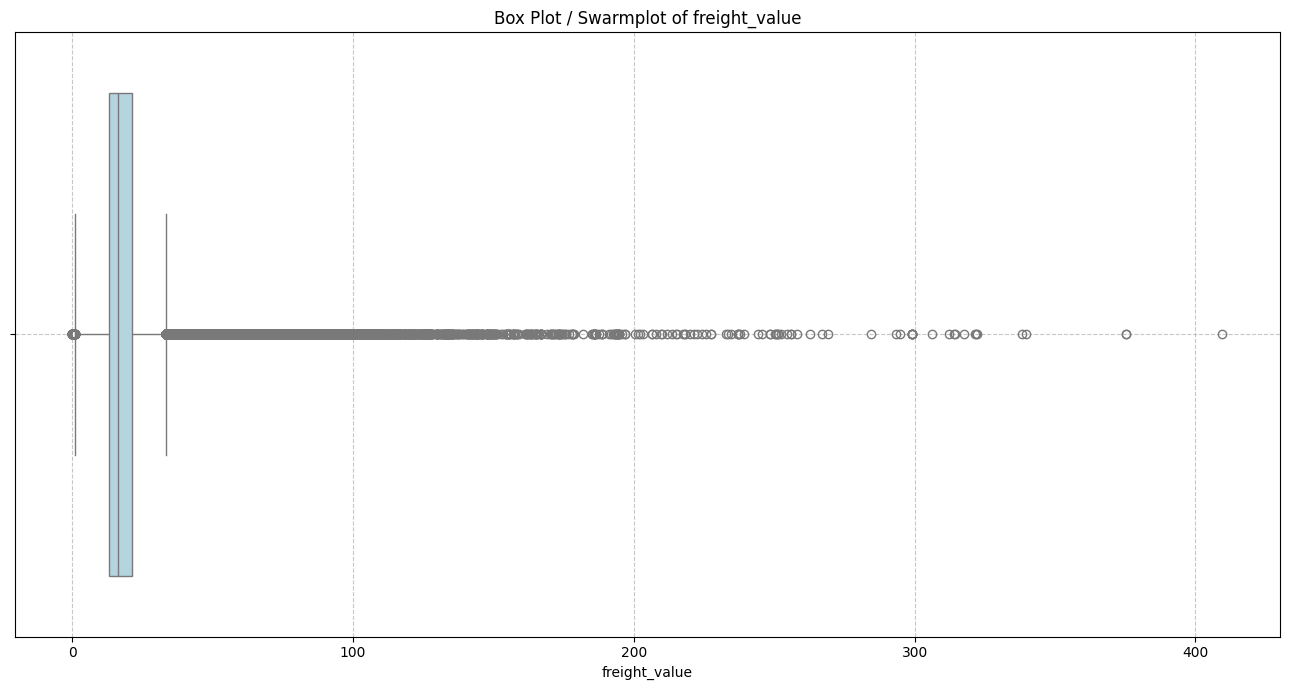

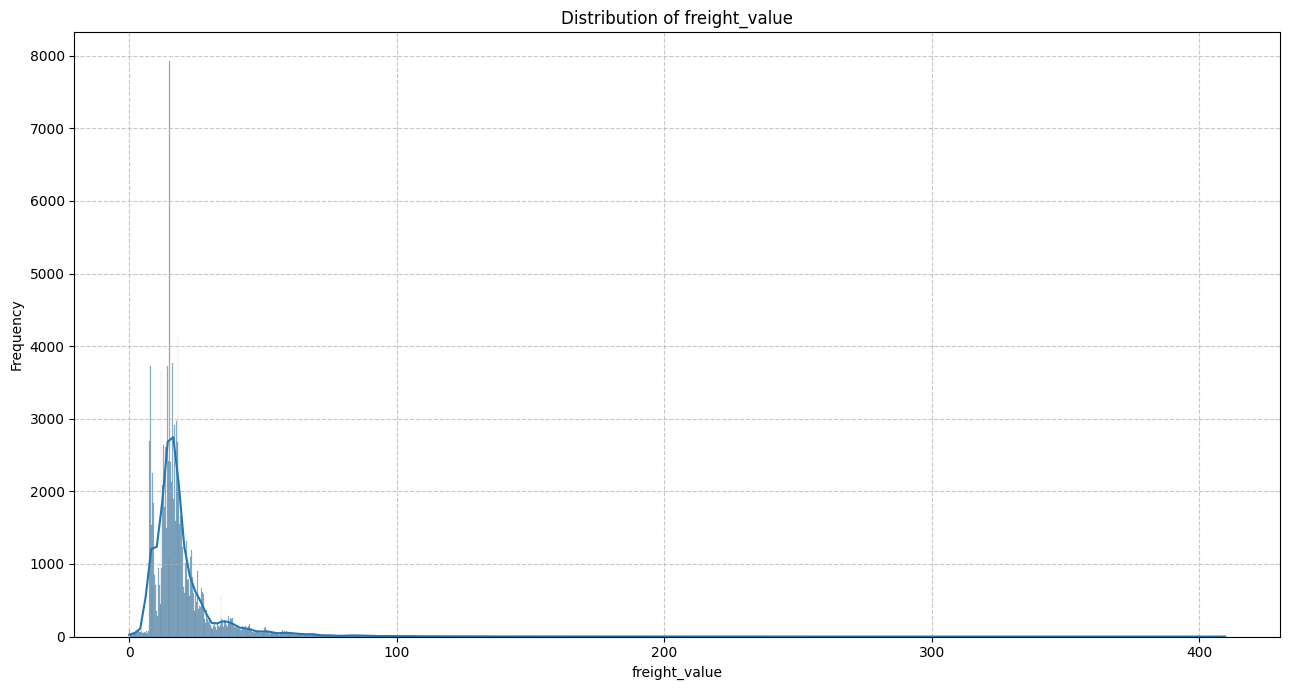

In [107]:
variable_EDA(analysys, 'freight_value')

### Summary for 'Freight Value'

'Freight value' also exhibits a **right-skewed distribution with significant outliers**, indicating most shipments are moderately priced, but some incur much higher costs, influencing the average.

### Analysis for 'Review Score' Variable

This section performs an Exploratory Data Analysis (EDA) on the 'review_score' variable, examining its descriptive statistics, distribution, and identifying any patterns. Given that review scores are discrete and ordinal (typically 1 to 5), the interpretation of plots like histograms and box plots will focus on frequency distribution across these integer values.

**** STATISTIC IDEX ****

          count    112372.000000
mean          4.032473
std           1.387849
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64
        


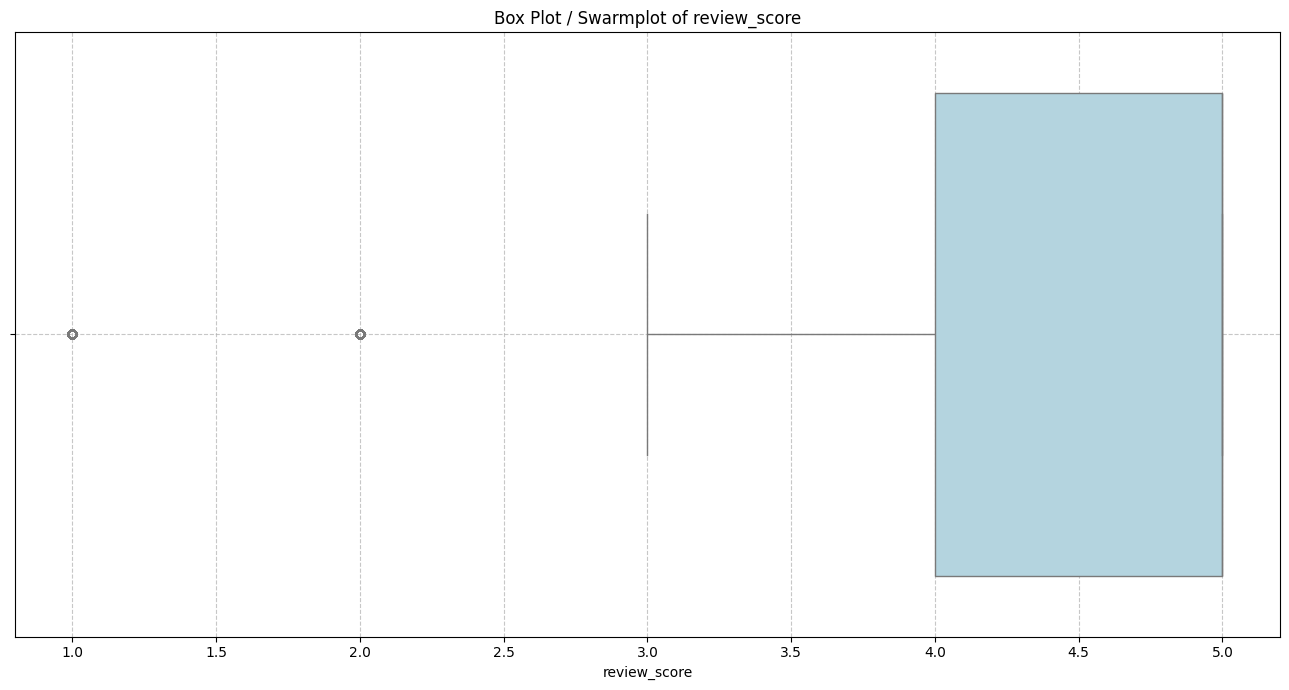

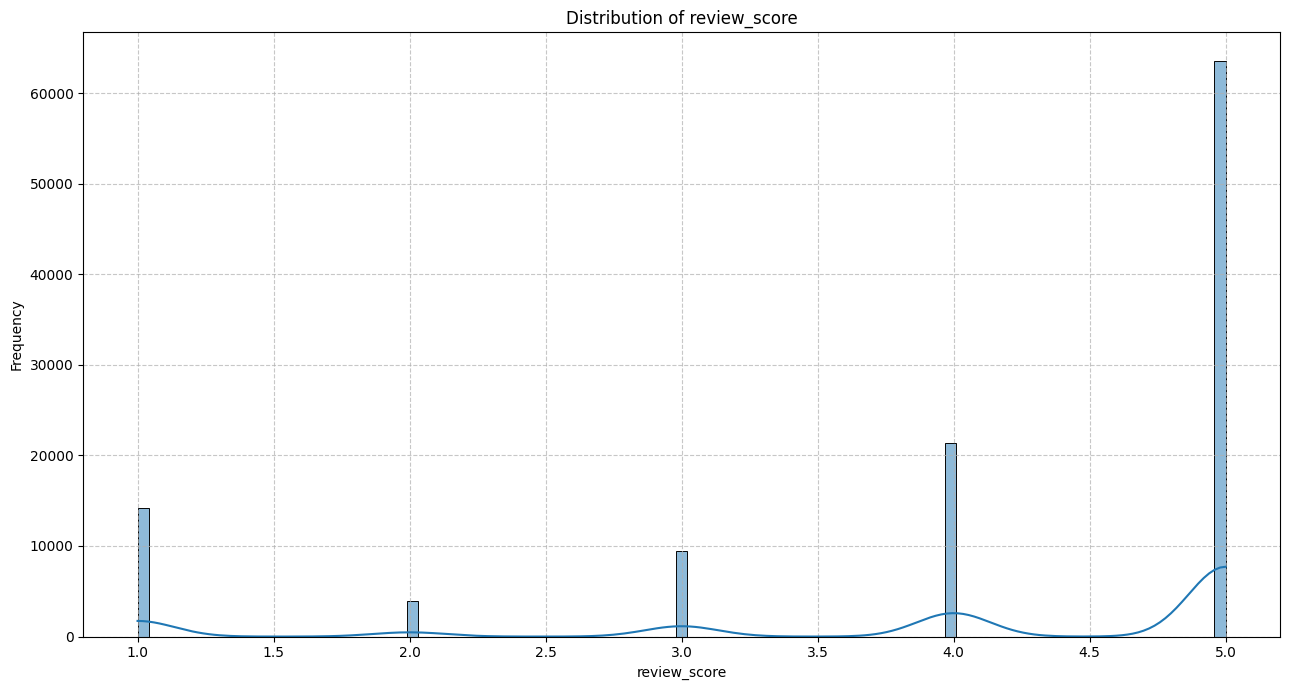

In [108]:
variable_EDA(analysys, 'review_score')

### Summary for 'Review Score'

The 'review_score' variable shows a **heavily left-skewed distribution**, indicating high customer satisfaction with most scores being 5s and 4s, despite some lower reviews.

### Analysis for 'Delivery Time (days)' Variable

This section performs an Exploratory Data Analysis (EDA) on the 'delivery_time_days' variable, examining its descriptive statistics, distribution, and identifying any potential outliers, to understand the typical delivery durations.

**** STATISTIC IDEX ****

          count    109746.000000
mean         11.536266
std           9.319475
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max         208.000000
Name: delivery_time_days, dtype: float64
        


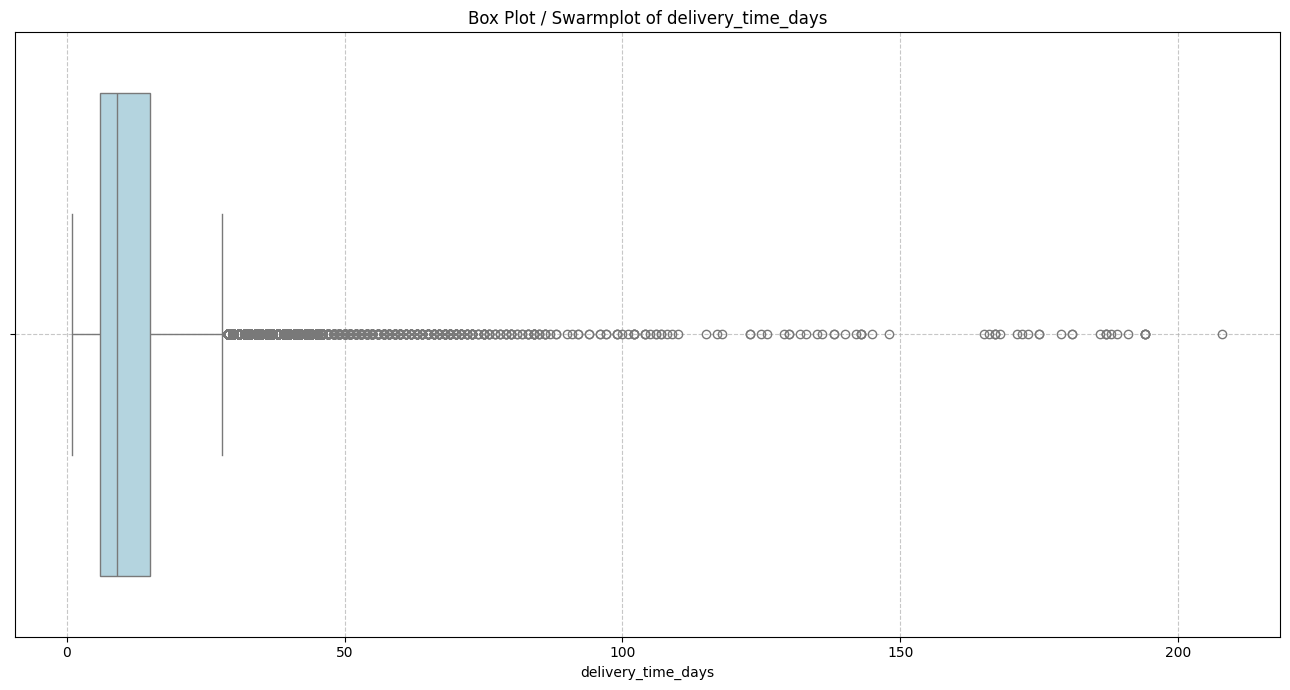

In [ ]:
variable_EDA(analysys, 'delivery_time_days')

### Summary for 'Delivery Time (days)'

'Delivery time' is **highly right-skewed with many outliers**, indicating most orders are delivered quickly, but a significant number experience considerable delays.

### Correlation Analysis: Review Score vs. Delivery Time

**Justification for Box Plot:** Given 'review_score' is a discrete variable (1-5) and 'delivery_time_days' is continuous, a Box Plot is ideal. It effectively displays the distribution of delivery times for each distinct review score, clearly showing medians, quartiles, and outliers per group, which a scatter plot would obscure due to overplotting.


C:\Users\Sker\AppData\Local\Temp\ipykernel_24660\3922214691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='delivery_time_days', data=analysys, palette='viridis')


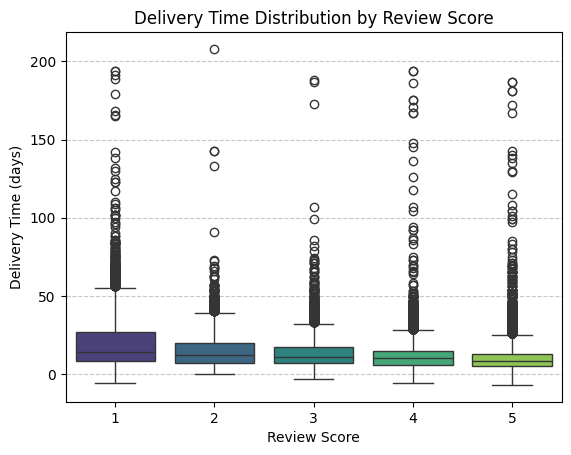

In [ ]:
sns.boxplot(x='review_score', y='delivery_time_days', data=analysys, palette='viridis') 
plt.title('Delivery Time Distribution by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Calculating Pearson's correlation coefficient between Delivery Time and Review Score
correlation = analysys['delivery_time_days'].corr(analysys['review_score'])
correlation

np.float64(-0.30307597306434103)

### Summary of Delivery Time vs. Review Score Relationship

The **Box Plot clearly visualizes a negative trend**: as customer review scores increase (from 1 to 5), the median delivery time generally decreases, with lower scores being associated with longer delivery durations and more outlier delays.

This visual observation is numerically confirmed by the **Pearson correlation coefficient of approximately -0.303**. This indicates a **weak to moderate negative linear relationship**, suggesting that while not a perfect one-to-one correspondence, faster deliveries do tend to lead to higher customer satisfaction.

### Statistical Significance: One-Way ANOVA Test

To confirm if the observed differences in mean delivery times across various review scores are statistically significant, we perform a One-Way ANOVA test. This test will help us determine if these differences are truly meaningful or just due to random chance.

In [ ]:
analysys = analysys.dropna()
review_scores_unique = sorted(analysys['review_score'].unique())
delivery_times_by_score = [analysys[analysys['review_score'] == score]['delivery_time_days'] for score in review_scores_unique]
f_statistic, p_value = stats.f_oneway(*delivery_times_by_score)
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

F-Statistic: 2845.1333
P-value: 0.0000e+00


### ANOVA Test Conclusion

The One-Way ANOVA test yielded an extremely low P-value (approx. 0.000), which is well below the common significance level of 0.05. This result leads us to **reject the null hypothesis**.

Therefore, the test statistically affirms that there are **significant differences in the mean delivery times across the various customer review scores**. This strongly supports our initial visual observations and correlation analysis, confirming that delivery speed is a statistically significant factor influencing customer satisfaction.